## General Conclusions

### Low User Retention:

#### 1. Retention peak — less than 7% on the 6th day, which already indicates weak engagement.

- Day 1 retention is about 2% (vs. the standard 30–40%) — this indicates problems with the first user experience. Most players do not return after their first session.  
- The retention peak is observed on day 6 (6.8%), which is unusual: the game manages to retain some users, but does so too late.  
- Day 7 retention is around 5.7% (benchmark 10–20%), and from days 8 to 12 retention stays at about 5%. This suggests moderate but unstable engagement among players who make it past the early stage.  
- By day 30 retention is 2.8% (normal 5–10%), after which it quickly declines:  
   - Day 40 — 1.7%  
   - Day 50 — 1.2%  
   - After day 50 it steadily decreases further. This indicates weak long-term loyalty and a lack of habit to return to the game regularly.  

#### 2. Retention over the last 2–3 years remains consistently low

- Compared to 2018, there was slight stabilization in 2019, but in 2020 it worsened again.  
- Across all analyzed years, players show the same retention curve: growth until day 6, then decline.  
- This suggests there were no significant product changes in recent years.  
- Within cohorts from the last 2 years there are no meaningful differences, and differences between years are minor.  

Analysis of retention for the last 3 years (2018–2020) shows that retention remains consistently low. However, when examined in more detail, a pattern emerges: retention gradually rises from day 1 to day 6, peaking at ~6.8%, after which it drops sharply. On average, around 4.5–5% of players remain by days 10–15, and by day 30 — only ~3%. The 2019 cohort shows the best stability, while 2020 demonstrates a noticeably faster decline. This confirms that in recent years there have been no meaningful product improvements to increase engagement, and year-to-year differences are minor.  

#### 3. Number of Returns:

Out of 1,000,000 unique users, more than 238,378 (≈23.8%) returned to the game at least once. This indicates fairly good initial interest, but weak long-term loyalty.  

#### 4. Total Number of Sessions (game logins):

A total of 9,180,915 logins were recorded, averaging ~9.18 logins per user. This suggests that some players are quite active at the start, but their interest quickly fades afterwards.


## Recommendations

- Improve the first-launch experience and tutorial to increase Day 1 retention (bonuses, gamified onboarding, instant demonstration of the game’s “core feature”).  

- Introduce motivational mechanics for Days 2–7: daily quests, loyalty rewards, early achievements.  

- Segment players who stay longer than 7 days to understand who is being successfully engaged — and how this success can be scaled.  

- Continue comparing retention across cohorts and years to track the effectiveness of product changes.  

- Use A/B testing to validate different engagement and retention hypotheses.  

- Benchmark against current metrics for the game’s genre to better identify weak points.


In [9]:
import gdown
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
from datetime import timedelta

In [10]:
file_id = "1VFRI4O_QwMQO4o4LRljqF827vpj31Q6Y"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "reg_data.csv", quiet=False)

reg_data = pd.read_csv("reg_data.csv", sep=';')

Downloading...
From: https://drive.google.com/uc?id=1VFRI4O_QwMQO4o4LRljqF827vpj31Q6Y
To: /Users/pashaborisiuk/Downloads/reg_data.csv
100%|██████████| 18.0M/18.0M [00:02<00:00, 7.04MB/s]


In [11]:
reg_data.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [12]:
reg_data.nunique()

reg_ts    1000000
uid       1000000
dtype: int64

In [13]:
file_id = "1n_4N5h6gnPoZVh1u2hr03f1GrqZ0o5a5"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, "auth_data.csv", quiet=False)

auth_data = pd.read_csv("auth_data.csv", sep=';')

Downloading...
From (original): https://drive.google.com/uc?id=1n_4N5h6gnPoZVh1u2hr03f1GrqZ0o5a5
From (redirected): https://drive.google.com/uc?id=1n_4N5h6gnPoZVh1u2hr03f1GrqZ0o5a5&confirm=t&uuid=f45bfb2f-4389-4f46-8a2d-5716c3ca27f7
To: /Users/pashaborisiuk/Downloads/auth_data.csv
100%|██████████| 170M/170M [00:22<00:00, 7.72MB/s] 


In [14]:
auth_data.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [15]:
auth_data.nunique()

auth_ts    9180915
uid        1000000
dtype: int64

In [16]:
print("Registrations — missing values:")
print(reg_data.isnull().sum())

print("\nLogins — missing values:")
print(auth_data.isnull().sum())

Registrations — missing values:
reg_ts    0
uid       0
dtype: int64

Logins — missing values:
auth_ts    0
uid        0
dtype: int64


In [17]:
print("Duplicates in registration data:", reg_data.duplicated().sum())
print("Duplicates in login data:", auth_data.duplicated().sum())

Duplicates in registration data: 0
Duplicates in login data: 0


In [18]:
# Converting timestamp to datetime
reg_data['reg_date'] = pd.to_datetime(reg_data['reg_ts'], unit='s').dt.date
auth_data['auth_date'] = pd.to_datetime(auth_data['auth_ts'], unit='s').dt.date

In [19]:
print("Registration: from", reg_data['reg_date'].min(), "to", reg_data['reg_date'].max())
print("Logins: from", auth_data['auth_date'].min(), "to", auth_data['auth_date'].max())

Registration: from 1998-11-18 to 2020-09-23
Logins: from 1998-11-18 to 2020-09-23


In [20]:
# Merging data
merged = pd.merge(reg_data, auth_data, on='uid', how='left')

In [23]:
merged.head()

,reg_ts,uid,reg_date,auth_ts,auth_date
0,911382223,1,1998-11-18,911382223,1998-11-18
1,932683089,2,1999-07-22,932683089,1999-07-22
2,932683089,2,1999-07-22,932921206,1999-07-25
3,932683089,2,1999-07-22,933393015,1999-07-31
4,932683089,2,1999-07-22,933875379,1999-08-05


In [25]:
merged['auth_date'] = pd.to_datetime(merged['auth_date'])
merged['reg_date'] = pd.to_datetime(merged['reg_date'])

In [26]:
# Calculating the difference in days
merged['day_diff'] = (merged['auth_date'] - merged['reg_date']).dt.days

In [27]:
merged.head()

,reg_ts,uid,reg_date,auth_ts,auth_date,day_diff
0,911382223,1,1998-11-18,911382223,1998-11-18,0
1,932683089,2,1999-07-22,932683089,1999-07-22,0
2,932683089,2,1999-07-22,932921206,1999-07-25,3
3,932683089,2,1999-07-22,933393015,1999-07-31,9
4,932683089,2,1999-07-22,933875379,1999-08-05,14


In [28]:
def regular_users(merged):
    
# All users who logged into the game more than once
    auth_count_usres = merged[merged['day_diff'] > 0]
    
# Number of unique users logging in more than once
    playing_users = auth_count_usres.reg_ts.nunique()
    
    return playing_users

In [29]:
playing_users = regular_users(merged)
print("Number of unique users logging in more than once:", playing_users)

Number of unique users logging in more than once: 238378


In [31]:
def calculate_retention(merged, max_day=90):

# Calculating the difference in days between login and registration
    merged['day_diff'] = (pd.to_datetime(merged['auth_date']) - pd.to_datetime(merged['reg_date'])).dt.days

# Keeping only day_diff >= 0 and limiting by max_day
    merged = merged[(merged['day_diff'] > 0) & (merged['day_diff'] <= max_day)]

# Calculating the total number of registered users
    total_users = reg_data['uid'].nunique()

# Calculating unique users who returned on the N-th day after registration
    daily_retention = merged.groupby('day_diff')['uid'].nunique()

# Converting to percentages
    retention = (daily_retention / total_users * 100).round(2)

    return retention

In [32]:
# Retention calculation
retention = calculate_retention(merged, max_day=90)
print(retention)

day_diff
1     2.01
2     4.10
3     4.63
4     5.23
5     5.99
      ... 
86    1.08
87    1.09
88    1.09
89    1.10
90    1.07
Name: uid, Length: 90, dtype: float64


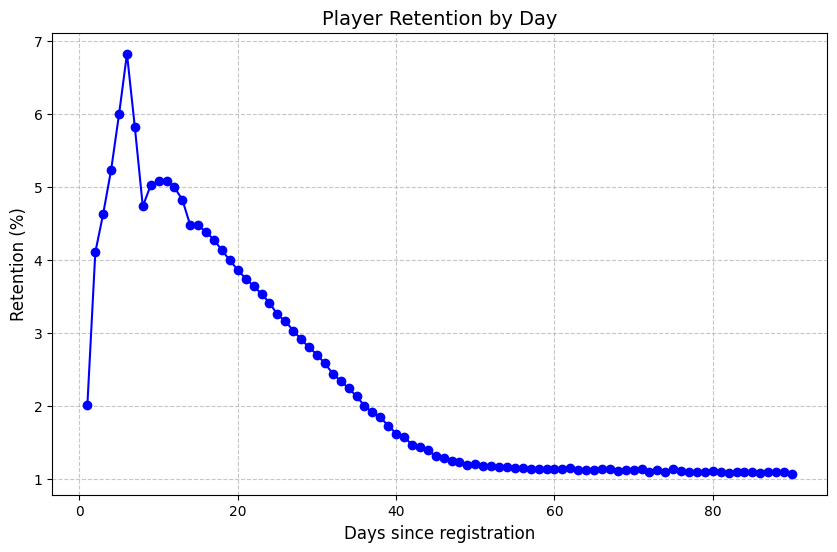

In [33]:
# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(retention, marker='o', linestyle='-', color='b')

# Chart settings
plt.title('Player Retention by Day', fontsize=14)
plt.xlabel('Days since registration', fontsize=12)
plt.ylabel('Retention (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [34]:
def get_yearly_retention(merged, year, max_day=90):
# Filtering by registration year
    merged_year = merged[merged['reg_date'].dt.year == year].copy()

# Calculating days since registration
    merged_year['day_diff'] = (merged_year['auth_date'] - merged_year['reg_date']).dt.days

# Keeping only logins with day_diff >= from_day
    filtered = merged_year[(merged_year['day_diff'] >= 1) & (merged_year['day_diff'] <= max_day)]

# Number of unique logins by cohort and day
    cohort_counts = filtered.groupby(['reg_date', 'day_diff'])['uid'].nunique().unstack(fill_value=0)

# Cohort size
    cohort_sizes = merged_year.groupby('reg_date')['uid'].nunique()

# Retention calculation in percentages
    retention = cohort_counts.divide(cohort_sizes, axis=0) * 100
    retention = retention.round(2)

    return retention


In [35]:
# Converting to datetime
merged['reg_date'] = pd.to_datetime(merged['reg_date'])
merged['auth_date'] = pd.to_datetime(merged['auth_date'])


retention_2018 = get_yearly_retention(merged, 2018, max_day=30)
retention_2019 = get_yearly_retention(merged, 2019, max_day=30)
retention_2020 = get_yearly_retention(merged, 2020, max_day=30)

In [36]:
def get_average_retention(retention_df):
    return retention_df.mean(axis=0)

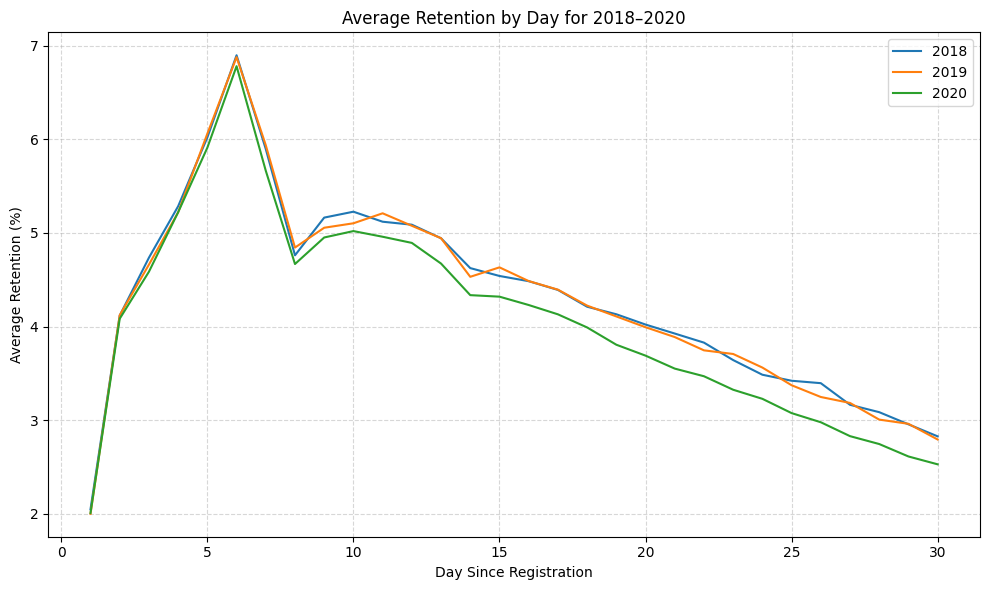

In [37]:
avg_2018 = get_average_retention(retention_2018)
avg_2019 = get_average_retention(retention_2019)
avg_2020 = get_average_retention(retention_2020)

# Line chart comparison by years
plt.figure(figsize=(10, 6))
plt.plot(avg_2018, label='2018')
plt.plot(avg_2019, label='2019')
plt.plot(avg_2020, label='2020')
plt.title('Average Retention by Day for 2018–2020')
plt.xlabel('Day Since Registration')
plt.ylabel('Average Retention (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [38]:
def calculate_cohort_retention(merged, max_day=90, years_back=5):
# Calculating the difference in days
    merged['day_diff'] = (pd.to_datetime(merged['auth_date']) - pd.to_datetime(merged['reg_date'])).dt.days

# Keeping only day_diff >= 0 and limiting by max_day
    filtered = merged[(merged['day_diff'] >= 0) & (merged['day_diff'] <= max_day)]

# Limiting by registration date — last X years
    latest_date = pd.to_datetime(filtered['reg_date']).max()
    min_date = latest_date - timedelta(days=365 * years_back)
    filtered = filtered[pd.to_datetime(filtered['reg_date']) >= min_date]

# Counting unique users in each cohort and retention day
    cohort_counts = filtered.groupby(['reg_date', 'day_diff'])['uid'].nunique().unstack(fill_value=0)

# Cohort sizes
    cohort_sizes = filtered[filtered['day_diff'] == 0].groupby('reg_date')['uid'].nunique()

# Retention calculation in percentages
    retention = cohort_counts.divide(cohort_sizes, axis=0) * 100
    retention = retention.round(2)

    return retention

In [39]:
retention = calculate_cohort_retention(merged, max_day=30, years_back=2)

In [40]:
def plot_cohort_retention_simple(retention_df):

    plt.figure(figsize=(12, 6))
    sns.heatmap(retention_df, cmap="YlGnBu", cbar_kws={'label': 'Retention %'})
    plt.title("Cohort Retention")
    plt.xlabel("Day Since Registration")
    plt.ylabel("Registration Date")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

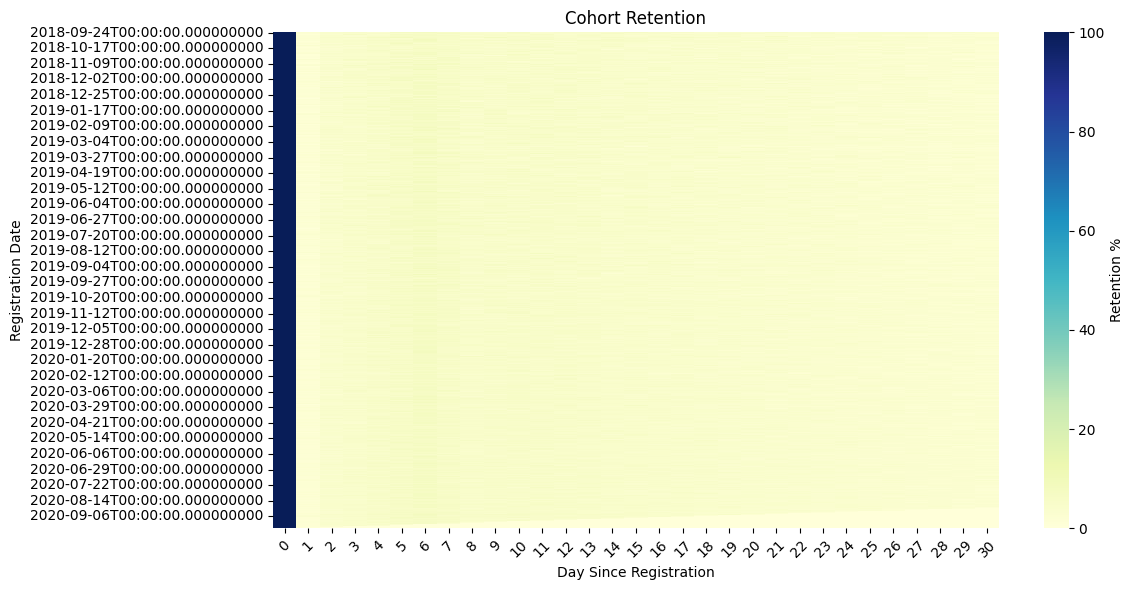

In [41]:
plot_cohort_retention_simple(retention)